# **CYBERSECURITY PROJECT**

**Phishing URL Detection**


Group 22
(IT -1)
*   Shreya Singhal (02701032021)
*   Neetika Tandon (04001032021)
*   Arnisha Barman ()
*   Shreya Ganjoo (02201032021)
*   Sanya ()


In [3]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**Importing Libraries**

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import plotly.graph_objects as go
import seaborn as sns # data visualization
%matplotlib inline
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
import random

ModuleNotFoundError: No module named 'numpy'

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reading the data**

In [ ]:
data= pd.read_csv("/content/dataset_phishing.csv.zip")
data

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


# **1. Exploratory Data Analysis (EDA)**

In [ ]:
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
data.tail()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate
11429,http://174.139.46.123/ap/signin?openid.pape.ma...,477,14,1,24,0,1,1,9,0,...,1,1,1,0,-1,0,1,1,0,phishing


In [ ]:
data.shape

(11430, 89)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

**1.1 Dropping Columns**

In [ ]:
df = data.drop(['length_hostname','ratio_intErrors','ratio_extErrors','empty_title','dns_record','domain_age','domain_registration_length','domain_with_copyright','right_clic','whois_registered_domain','onmouseover','domain_in_title','ratio_extMedia','sfh','ratio_intMedia','iframe','submit_email','login_form','external_favicon','links_in_tags','domain_in_brand','brand_in_subdomain','brand_in_path','suspecious_tld','statistical_report','nb_hyperlinks','ratio_intHyperlinks','ratio_extHyperlinks','ratio_nullHyperlinks','nb_extCSS','ratio_intRedirection','ratio_extRedirection','nb_dots','nb_hyphens','nb_at','nb_qm','nb_and','nb_or','nb_eq','nb_underscore','nb_tilde','nb_percent','nb_slash','nb_star','nb_colon','nb_comma','nb_semicolumn','nb_dollar','nb_space','nb_www','nb_com','nb_dslash','http_in_path','https_token','ratio_digits_url','ratio_digits_host','punycode','port','tld_in_path','tld_in_subdomain','abnormal_subdomain','nb_subdomains','prefix_suffix','random_domain','shortening_service','path_extension','nb_redirection','nb_external_redirection','length_words_raw','char_repeat','shortest_words_raw','shortest_word_host','shortest_word_path','longest_words_raw','longest_word_host','longest_word_path','avg_words_raw','avg_word_host','avg_word_path','phish_hints'],axis =1)
df.shape

(11430, 9)

In [ ]:
df

,url,length_url,ip,popup_window,safe_anchor,web_traffic,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,0,0,0.000000,0,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,1,0,100.000000,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,1,0,100.000000,5828815,1,0,phishing
3,http://rgipt.ac.in,18,0,0,62.500000,107721,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,0,0,0.000000,8725,0,6,legitimate
...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,0,0,0.000000,3980,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,0,0,0.000000,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,1,0,80.000000,8,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,0,0,0.000000,2455493,0,4,legitimate


In [ ]:
df.describe()

,length_url,ip,popup_window,safe_anchor,web_traffic,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000
mean,61.126684,0.150569,0.006037,37.063922,8.567566e+05,0.533946,3.185739
std,55.297318,0.357644,0.077465,39.073385,1.995606e+06,0.498868,2.536955
min,12.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,33.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
50%,47.000000,0.000000,0.000000,23.294574,1.651000e+03,1.000000,3.000000
75%,71.000000,0.000000,0.000000,75.000000,3.738455e+05,1.000000,5.000000
max,1641.000000,1.000000,1.000000,100.000000,1.076799e+07,1.000000,10.000000


In [ ]:
df.isnull().sum()

url             0
length_url      0
ip              0
popup_window    0
safe_anchor     0
web_traffic     0
google_index    0
page_rank       0
status          0
dtype: int64

In [ ]:
df.status.value_counts()

legitimate    5715
phishing      5715
Name: status, dtype: int64

Text(0.5, 1.0, 'Count of URLs')

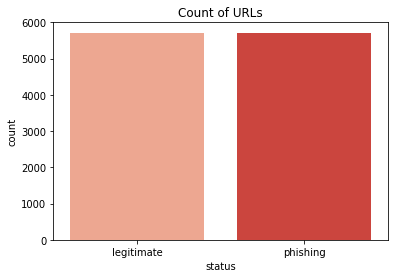

In [ ]:
sns.countplot(x="status",palette = "Reds", data = df)
plt.title('Count of URLs')

The above bar graph gives the the total count of legitimate and phishing URLs. The number of legitimate and phishing sites are equal in the dataset taken.

In [ ]:
# distribution of ranking of page
chart = go.Figure(data = [go.Pie(labels = df['page_rank'].value_counts().index, values = df['page_rank'].value_counts(), hole =0)])
chart.update_layout(legend_title_text ='Page Rank')
chart.show()

Text(0.5, 1.0, 'Engagement')

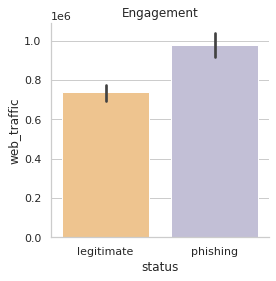

In [ ]:
sns.set(style ='whitegrid', color_codes = True)
sns.catplot(x='status', y ='web_traffic',height = 4, palette = 'PuOr', aspect = 1, kind ='bar',data = df)
plt.title('Engagement')

In [ ]:
#describing each feature
df.describe()[1:].T.style.background_gradient(cmap = "Oranges")

,mean,std,min,25%,50%,75%,max
length_url,61.126684,55.297318,12.000000,33.000000,47.000000,71.000000,1641.000000
ip,0.150569,0.357644,0.000000,0.000000,0.000000,0.000000,1.000000
popup_window,0.006037,0.077465,0.000000,0.000000,0.000000,0.000000,1.000000
safe_anchor,37.063922,39.073385,0.000000,0.000000,23.294574,75.000000,100.000000
web_traffic,856756.643307,1995606.021793,0.000000,0.000000,1651.000000,373845.500000,10767986.000000
google_index,0.533946,0.498868,0.000000,0.000000,1.000000,1.000000,1.000000
page_rank,3.185739,2.536955,0.000000,1.000000,3.000000,5.000000,10.000000


**1.2 Correlation Matrix**

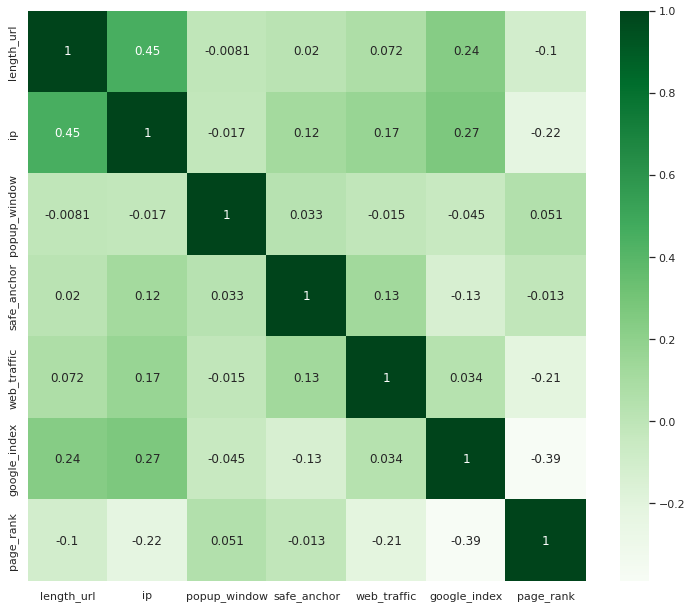

In [ ]:
plt.figure(figsize=(12.5,10.5))
sns.heatmap(df.corr(), annot = True, cmap = "Greens")
plt.show()

In the heatmap, "web_traffic" and "ip" have a correlation coefficient of 0.17 implying that both the columns are 17% related to each other.

"popup_window" and "length_url" have a correlation coefficient of -0.0081 implying that both the columns are 0.81% relevant inversely.

**1.3 Shuffling the data**

In [ ]:
df_shuffled = shuffle(df, random_state= 42)

**1.4 Choosing 7000 samples**

In [ ]:
data_size = 8000

In [ ]:
df_used = df_shuffled[:data_size].copy()

**1.5 Checking for distribution**

Text(0.5, 1.0, 'Count of URLs after shuffling')

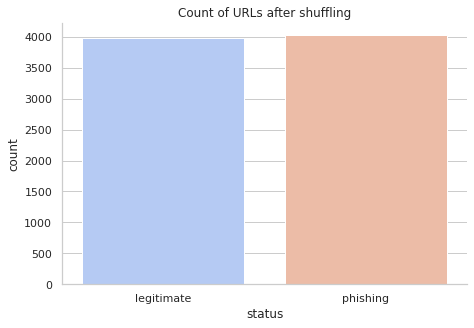

In [ ]:
sns.catplot(x="status",height=4.5, aspect=1.5,palette = "coolwarm", kind="count",data=df_used);
plt.title('Count of URLs after shuffling')

After shuffling the data in status, the count of phishing URLs is more than the count of legitimate ones.

In [ ]:
df_used.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 7529 to 2369
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           8000 non-null   object 
 1   length_url    8000 non-null   int64  
 2   ip            8000 non-null   int64  
 3   popup_window  8000 non-null   int64  
 4   safe_anchor   8000 non-null   float64
 5   web_traffic   8000 non-null   int64  
 6   google_index  8000 non-null   int64  
 7   page_rank     8000 non-null   int64  
 8   status        8000 non-null   object 
dtypes: float64(1), int64(6), object(2)
memory usage: 883.0+ KB


**1.6 Replace the status with 0/1**

In [ ]:
df_used.replace({'legitimate':0, 'phishing':1}, inplace=True)

In [ ]:
df_used.status.value_counts()

1    4026
0    3974
Name: status, dtype: int64

# **2. Feature Extraction**
In this step, features are extracted from the URLs dataset.
The extracted features are Address Bar based Features

**2.1 Address Bar Based Features**
Many features can be extracted that can be consided as address bar base features. Out of them, below mentioned were considered for this project.

1. Domain of URL
2. IP Address in URL
3. "@" Symbol in URL
4. "." Dots in URL
5. "\ Symbol in URL
6. Length of URL
7. Prefix or Suffix "-" in Domain
Each of these features are explained and the coded below:

In [ ]:
# importing the required packages
from urllib.parse import urlparse,urlencode
import ipaddress
import re

**2.1.1 Domain of URL**

Here, we are just extracting the domain present in the URL. This feature doesn't have much significance in the training. May even be dropped while training the model.

In [ ]:
# 1.Domain of the URL (Domain) 
def getDomain(url):  
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
	       domain = domain.replace("www.","")
  return domain

**2.1.2 IP Address in URL**

Checks for the presence of IP address in the URL. URLs may have IP address instead of domain name. If an IP address is used as an alternative of the domain name in the URL, we can be sure that someone is trying to steal personal information with this URL.

If the domain part of URL has IP address, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [ ]:
# 2.Checks for IP address in URL (ip)
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip

**2.1.3 @ Symbol in URL**

Checks for the presence of '@' symbol in the URL. Using “@” symbol in the URL leads the browser to ignore everything preceding the “@” symbol and the real address often follows the “@” symbol.

If the URL has '@' symbol, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [ ]:
# 3.Checks the presence of @ in URL (nb_at)
def haveAtSign(url):
  if "@" in url:
    at = 1    
  else:
    at = 0    
  return at

**2.1.4 Dot(.) Symbol in URL**



In [ ]:
# 4.Checks the presence of . in URL (nb_dots)
def havedot(url):
  if "." in url:
    at = 1    
  else:
    at = 0    
  return at

**2.1.5 Length of URL**

Computes the length of the URL. Phishers can use long URL to hide the doubtful part in the address bar. In this project, if the length of the URL is greater than or equal 54 characters then the URL classified as phishing otherwise legitimate.

If the length of URL >= 54 , the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [ ]:
# 5.Finding the length of URL and categorizing (length_url)
def getLength(url):
  if len(url) < 54:
    length = 0            
  else:
    length = 1            
  return length

**2.1.6 / Symbol in URL**

In [ ]:
# 6.Gives number of '/' in URL (nb_slash)
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

**2.1.7 Prefix or Suffix "-" in Domain**

Checking the presence of '-' in the domain part of URL. The dash symbol is rarely used in legitimate URLs. Phishers tend to add prefixes or suffixes separated by (-) to the domain name so that users feel that they are dealing with a legitimate webpage.

If the URL has '-' symbol in the domain part of the URL, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [ ]:
# 7.Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0            # legitimate

**2.2 Dividing the data into features and labels**

In [ ]:
X = df_used[['url']].copy()
y = df_used.status.copy()

**2.3 Initialise tokenizer, stemmer and vectorizer**

In [ ]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
stemmer = SnowballStemmer("english")
cv = CountVectorizer()

## **3. Preparing the data**

In [ ]:
def prepare_data(X) :
    X['text_tokenized'] = X.url.map(lambda t: tokenizer.tokenize(t))
    X['text_stemmed'] = X.text_tokenized.map(lambda t: [stemmer.stem(word) for word in t])
    X['text_sent'] = X.text_stemmed.map(lambda t: ' '.join(t))
    features = cv.fit_transform(X.text_sent)
    return X, features

In [ ]:
X, features = prepare_data(X)

**3.1 Import and initialise the models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svc = SVC()

# **4. Train and test the models with different training percentages**

In [ ]:
def train_test_model(model, X, y, training_percentage) :
    trainX, testX, trainY, testY = train_test_split(X, y, test_size=1-training_percentage, stratify=y, random_state=42)
    model.fit(trainX, trainY)
    predY = model.predict(testX)
    accuracy = accuracy_score(testY, predY)
    precision = precision_score(testY, predY, pos_label=1)
    recall = recall_score(testY, predY, pos_label=1)
    return accuracy, precision, recall  

In [ ]:
training_sizes = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
def model_results(model) :
    results = []
    for p in training_sizes :
        results.append(train_test_model(model, features, y, p))
    return pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall'])

why we chose these models

In [ ]:
logreg_results = model_results(logreg)
knn_results = model_results(knn)
dtree_results = model_results(dtree)
rfc_results = model_results(rfc)
svc_results = model_results(svc)

In [ ]:
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']
model_results = [logreg_results, knn_results, dtree_results, rfc_results, svc_results]

**4.1 Finding accuracies, precision and recalls**

In [ ]:
accuracies = []
precisions = []
recalls = []
for model in model_results :
    accuracies.append(model.Accuracy.values)
    precisions.append(model.Precision.values)
    recalls.append(model.Recall.values)

In [ ]:
accuracies = pd.DataFrame(np.transpose(accuracies), columns=models, index=training_sizes*100)
precisions = pd.DataFrame(np.transpose(precisions), columns=models, index=training_sizes*100)
recalls = pd.DataFrame(np.transpose(recalls), columns=models, index=training_sizes*100)

In [ ]:
accuracies

,Logistic Regression,KNN,Decision Tree,Random Forest,SVM
10.0,0.867361,0.752083,0.817222,0.860833,0.829583
20.0,0.882344,0.774687,0.844688,0.868750,0.849688
30.0,0.885536,0.784286,0.863929,0.871250,0.856786
40.0,0.895208,0.781875,0.868125,0.883125,0.866458
50.0,0.898000,0.796750,0.874250,0.890500,0.873000
60.0,0.903750,0.799375,0.873750,0.898750,0.880938
70.0,0.905873,0.802166,0.821324,0.843399,0.890046
80.0,0.908750,0.797500,0.821250,0.848125,0.891250
90.0,0.916250,0.807500,0.851250,0.857500,0.900000


In [ ]:
precisions

,Logistic Regression,KNN,Decision Tree,Random Forest,SVM
10.0,0.863290,0.809219,0.805401,0.864737,0.791484
20.0,0.879226,0.815314,0.841460,0.861744,0.816653
30.0,0.887504,0.809854,0.856202,0.872999,0.827060
40.0,0.894759,0.792396,0.856743,0.884376,0.839908
50.0,0.902659,0.815789,0.881313,0.890045,0.850816
60.0,0.909950,0.825269,0.883588,0.898883,0.864256
70.0,0.911913,0.815133,0.793078,0.807692,0.874010
80.0,0.913425,0.820240,0.796571,0.815022,0.877844
90.0,0.926396,0.816794,0.828704,0.829157,0.892944


In [ ]:
recalls

,Logistic Regression,KNN,Decision Tree,Random Forest,SVM
10.0,0.874965,0.663815,0.839636,0.857577,0.897875
20.0,0.888233,0.714064,0.851909,0.880472,0.904378
30.0,0.884670,0.746629,0.876863,0.870830,0.904542
40.0,0.897351,0.767798,0.886175,0.883278,0.907699
50.0,0.893691,0.769995,0.866865,0.892697,0.906607
60.0,0.897516,0.762733,0.862733,0.900000,0.905590
70.0,0.899834,0.784768,0.872517,0.903974,0.913079
80.0,0.904348,0.765217,0.865839,0.903106,0.910559
90.0,0.905707,0.796526,0.888337,0.903226,0.910670


**4.2 Plotting the accuracy, precision, and recall of the 5 models**

Text(0, 0.5, 'Accuracy')

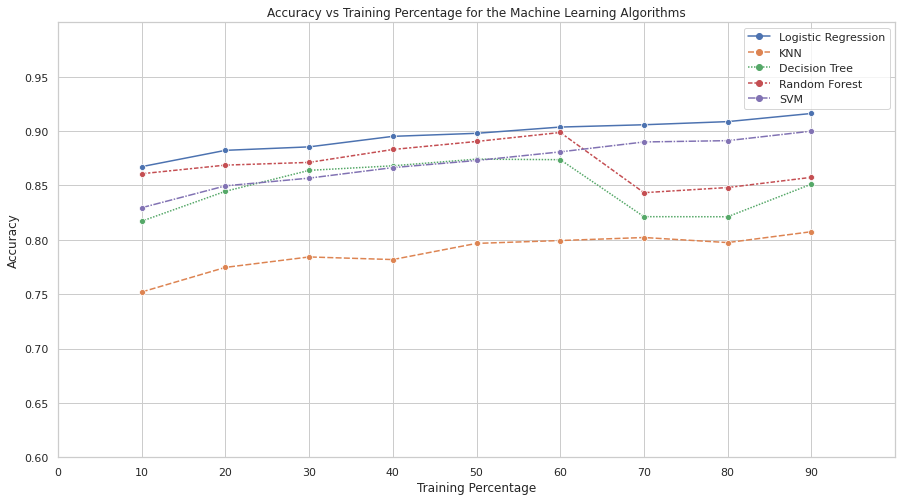

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style('whitegrid')
g = sns.lineplot(data = accuracies, markers= ['o', 'o', 'o', 'o', 'o'])
g.set(xlim = (0,100), ylim = (0.6,1), xticks = np.arange(0, 100, 10), yticks = np.arange(0.6, 1, 0.05))
g.set_title("Accuracy vs Training Percentage for the Machine Learning Algorithms")
g.set_xlabel("Training Percentage")
g.set_ylabel("Accuracy")

Text(0, 0.5, 'Precision')

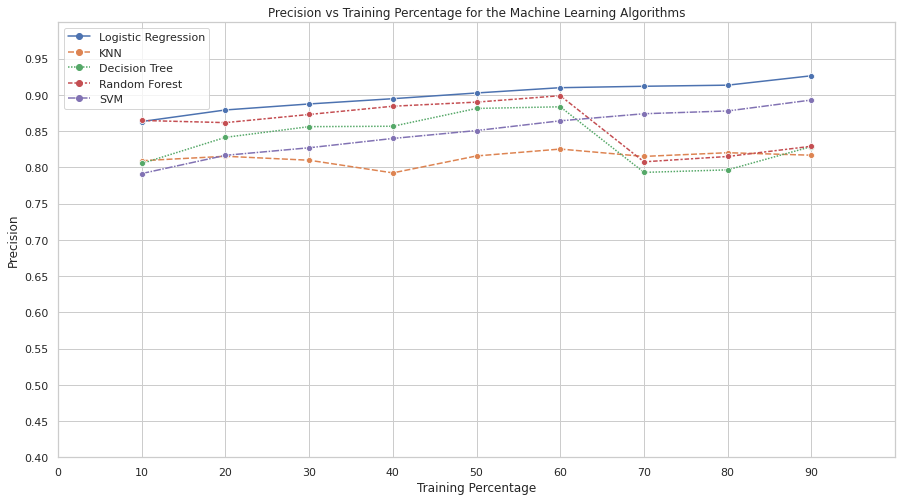

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style('whitegrid')
g = sns.lineplot(data = precisions, markers= ['o', 'o', 'o', 'o', 'o'])
g.set(xlim = (0,100), ylim = (0.4,1), xticks = np.arange(0, 100, 10), yticks = np.arange(0.4, 1, 0.05))
g.set_title("Precision vs Training Percentage for the Machine Learning Algorithms")
g.set_xlabel("Training Percentage")
g.set_ylabel("Precision")

Text(0, 0.5, 'Recall')

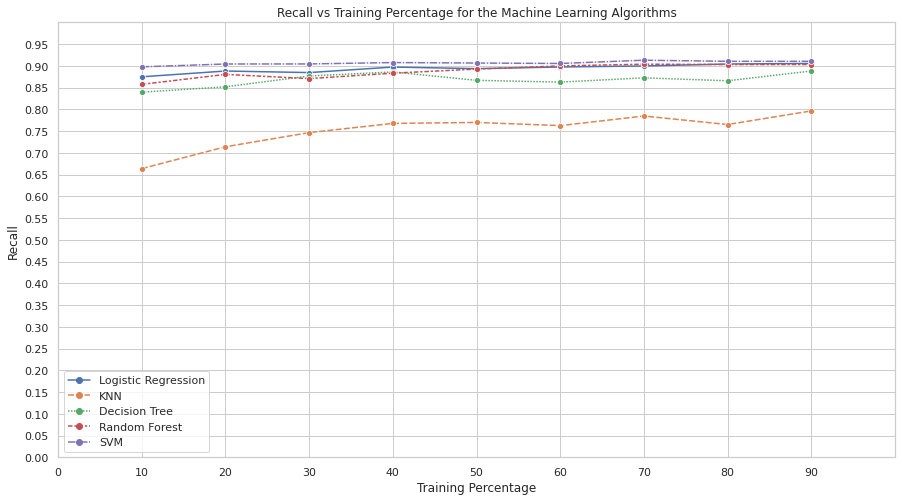

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style('whitegrid')
g = sns.lineplot(data = recalls, markers= ['o', 'o', 'o', 'o', 'o'])
g.set(xlim = (0,100), ylim = (0,1), xticks = np.arange(0, 100, 10), yticks = np.arange(0, 1, 0.05))
g.set_title("Recall vs Training Percentage for the Machine Learning Algorithms")
g.set_xlabel("Training Percentage")
g.set_ylabel("Recall")

**4.3 Doing the same with a feed forward neural network**

In [ ]:
hidden_units = [2, 4, 6, 8, 10, 12, 14, 16, 18]

In [ ]:
def train_test_nn(X, y, training_percentage, hidden_units) :
    trainX, testX, trainY, testY = train_test_split(X, y, test_size=1-training_percentage, stratify=y, random_state=42)
    trainX = trainX.toarray()
    testX = testX.toarray()
    trainY = np.array(trainY)
    testY = np.array(testY)
    model = Sequential()
    model.add(Input(shape=(trainX.shape[1], ), name='Input-Layer'))
    model.add(Dense(hidden_units, activation='relu', name='Hidden-Layer'))
    model.add(Dense(1, activation='sigmoid', name='Output-Layer'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Accuracy', 'Precision', 'Recall'])
    model.fit(trainX, trainY, batch_size = 10, epochs = 10, verbose=0)
    score = model.evaluate(testX, testY, batch_size = 1, verbose=2)
    return score

In [ ]:
accuracies_nn = []
precisions_nn = []
recalls_nn = []
for ts in training_sizes :
    a = []
    p = []
    r = []
    for hn in hidden_units :
        s = train_test_nn(features, y, ts, hn)
        a.append(s[1])
        p.append(s[2])
        r.append(s[3])
    accuracies_nn.append(a)
    precisions_nn.append(p)
    recalls_nn.append(r)

7200/7200 - 12s - loss: 0.4728 - Accuracy: 0.8360 - precision: 0.7745 - recall: 0.9509 - 12s/epoch - 2ms/step
7200/7200 - 9s - loss: 0.3241 - Accuracy: 0.8804 - precision: 0.8921 - recall: 0.8672 - 9s/epoch - 1ms/step
7200/7200 - 10s - loss: 0.3061 - Accuracy: 0.8840 - precision: 0.8945 - recall: 0.8725 - 10s/epoch - 1ms/step
7200/7200 - 9s - loss: 0.2979 - Accuracy: 0.8838 - precision: 0.8971 - recall: 0.8686 - 9s/epoch - 1ms/step
7200/7200 - 10s - loss: 0.2979 - Accuracy: 0.8786 - precision: 0.9058 - recall: 0.8468 - 10s/epoch - 1ms/step
7200/7200 - 10s - loss: 0.2872 - Accuracy: 0.8838 - precision: 0.8922 - recall: 0.8747 - 10s/epoch - 1ms/step
7200/7200 - 10s - loss: 0.2881 - Accuracy: 0.8792 - precision: 0.9059 - recall: 0.8479 - 10s/epoch - 1ms/step
7200/7200 - 10s - loss: 0.2834 - Accuracy: 0.8840 - precision: 0.8992 - recall: 0.8667 - 10s/epoch - 1ms/step
7200/7200 - 10s - loss: 0.2809 - Accuracy: 0.8844 - precision: 0.8972 - recall: 0.8700 - 10s/epoch - 1ms/step
6400/6400 - 8s

In [ ]:
accuracies_nn_df = pd.DataFrame(accuracies_nn, columns=hidden_units, index=training_sizes*100)
precisions_nn_df = pd.DataFrame(precisions_nn, columns=hidden_units, index=training_sizes*100)
recalls_nn_df = pd.DataFrame(recalls_nn, columns=hidden_units, index=training_sizes*100)

In [ ]:
accuracies_nn_df

In [ ]:
precisions_nn_df

In [ ]:
recalls_nn_df

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style('whitegrid')
g = sns.lineplot(data = accuracies_nn_df, markers= ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'])
g.set(xlim = (0,100), ylim = (0.65,1), xticks = np.arange(0, 100, 10), yticks = np.arange(0.65, 1, 0.05))
g.set_title("Accuracy vs Training Percentage for the Feed Forward Neural Network")
g.set_xlabel("Training Percentage")
g.set_ylabel("Accuracy")

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style('whitegrid')
g = sns.lineplot(data = precisions_nn_df, markers= ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'])
g.set(xlim = (0,100), ylim = (0,1), xticks = np.arange(0, 100, 10), yticks = np.arange(0, 1, 0.05))
g.set_title("Precision vs Training Percentage for the Feed Forward Neural Network")
g.set_xlabel("Training Percentage")
g.set_ylabel("Precision")

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style('whitegrid')
g = sns.lineplot(data = recalls_nn_df, markers= ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'])
g.set(xlim = (0,100), ylim = (0,1), xticks = np.arange(0, 100, 10), yticks = np.arange(0, 1, 0.05))
g.set_title("Recall vs Training Percentage for the Feed Forward Neural Network")
g.set_xlabel("Training Percentage")
g.set_ylabel("Recall")